In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
from keras.utils import plot_model 
from keras.models import Sequential, load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [4]:
attack_data=pd.read_csv('../DataSet/dataset_attack.csv')
normal_data=pd.read_csv('../DataSet/dataset_normal.csv')

In [5]:
normal_data.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
attack_data.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [6]:
drop_col=['ip.src', 'ip.dst','frame.protocols']
normal_data=normal_data.drop(drop_col,axis=1)
attack_data=attack_data.drop(drop_col,axis=1)

In [7]:
normal_data.head(5)

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,tcp.srcport,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,class
1,206,20,192,0,1,0,0,128,6,4175,...,0,0,1,1,0,0,0,16697,0.000000,normal
1,60,20,40,0,1,0,0,64,6,22,...,0,0,1,0,0,0,0,7504,0.000537,normal
1,60,20,40,0,1,0,0,63,6,22,...,0,0,1,0,0,0,0,7504,0.000155,normal
1,774,20,760,0,1,0,0,64,6,22,...,0,0,1,1,0,0,0,7504,0.004483,normal
1,774,20,760,0,1,0,0,63,6,22,...,0,0,1,1,0,0,0,7504,0.001321,normal


In [8]:
attack_data.head(5)

,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,tcp.srcport,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,class
1,212,20,198,0,0,0,0,112,17,0,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,20,198,0,0,0,0,112,17,0,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,20,198,0,0,0,0,112,17,0,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,20,198,0,0,0,0,112,17,0,...,0,0,0,0,0,0,0,0,0.0,attack
1,62,20,48,0,0,0,0,128,17,0,...,0,0,0,0,0,0,0,0,0.0,attack


In [9]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [10]:
X_normal= normal_data[features].values
X_attack= attack_data[features].values
Y_normal= normal_data['class']
Y_attack= attack_data['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [11]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [12]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [14]:
X_train=np.asarray(X_train).astype(int)

Y_train=np.asarray(Y_train).astype(int)
X_test=np.asarray(X_test).astype(int)
Y_test=np.asarray(Y_test).astype(int)

In [15]:
print(len(Y_train))

4527198


In [16]:
def create():
    # create the model
    model = Sequential()
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
model = create()

In [18]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 20)

Epoch 1/20
113180/113180 [==============================] - 338s 3ms/step - loss: 0.4133 - accuracy: 0.8121 - val_loss: 0.4059 - val_accuracy: 0.8146
Epoch 2/20
113180/113180 [==============================] - 200s 2ms/step - loss: 0.4047 - accuracy: 0.8141 - val_loss: 0.4052 - val_accuracy: 0.8137
Epoch 3/20
113180/113180 [==============================] - 124s 1ms/step - loss: 0.4038 - accuracy: 0.8142 - val_loss: 0.4046 - val_accuracy: 0.8134
Epoch 4/20
113180/113180 [==============================] - 124s 1ms/step - loss: 0.4032 - accuracy: 0.8142 - val_loss: 0.4039 - val_accuracy: 0.8132
Epoch 5/20
113180/113180 [==============================] - 120s 1ms/step - loss: 0.4028 - accuracy: 0.8144 - val_loss: 0.4048 - val_accuracy: 0.8131
Epoch 6/20
113180/113180 [==============================] - 127s 1ms/step - loss: 0.4025 - accuracy: 0.8145 - val_loss: 0.4041 - val_accuracy: 0.8140
Epoch 7/20
113180/113180 [==============================] - 131s 1ms/step - loss: 0.4024 - accuracy:

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

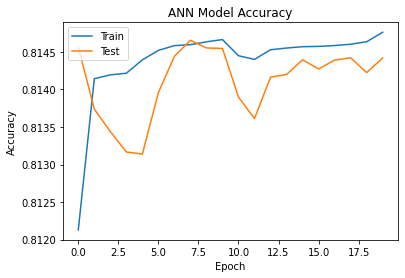

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Sample.png')
plt.show()

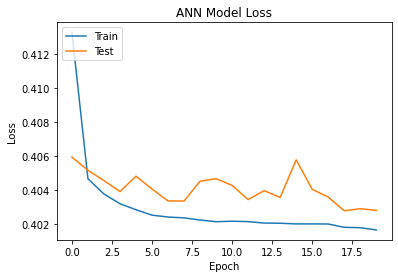

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('ANN Model loss.png')
plt.show()

In [22]:
predict = model.predict(X_test, verbose=1)

35369/35369 [==============================] - 27s 751us/step


In [23]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

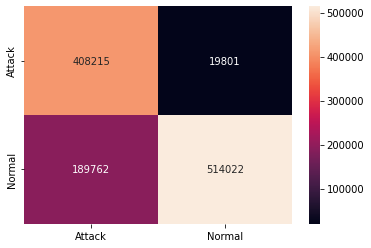

In [24]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [25]:
figure = ax.get_figure()    
figure.savefig('confusion.png', dpi=400)

In [26]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.48%
